In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import random

In [2]:
from statistics import mean

class BGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]
        for epoch in range(no_epochs):
            errors = []
            for i in range(len(x)):
                y_computed = self.eval(x[i])
                errors.append(y_computed - y[i])
            error = mean(errors)
            for i in range(len(x)):
                for j in range(0, len(x[0])):
                    self.coefficient_[j] = self.coefficient_[j] - learning_rate * error * x[i][j]
                self.coefficient_[len(x[0])] = self.coefficient_[len(x[0])] - learning_rate * error * 1
        self.intercept_ = self.coefficient_[-1]
        self.coefficient_ = self.coefficient_[:-1]

    def eval(self, xi):
        yi = self.coefficient_[-1]
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

In [3]:
class SGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]
        for epoch in range(no_epochs):
            for i in range(len(x)):
                y_computed = self.eval(x[i])
                crt_error = y_computed - y[i]
                for j in range(0, len(x[0])):
                    self.coefficient_[j] = self.coefficient_[j] - learning_rate * crt_error * x[i][j]
                self.coefficient_[len(x[0])] = self.coefficient_[len(x[0])] - learning_rate * crt_error * 1
        self.intercept_ = self.coefficient_[-1]
        self.coefficient_ = self.coefficient_[:-1]

    def eval(self, xi):
        yi = self.coefficient_[-1]
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

In [4]:
def load_data(filename, input_features, output_feature):
    file = pd.read_csv(filename)
    features = []
    for feature in input_features:
        features.append([float(value) for value in file[feature]])
    output_feature = [float(value) for value in file[output_feature]]
    return features, output_feature


def plot_histogram(x, variable_name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + variable_name)
    plt.show()


def plot_linearity(input_feature, output_feature, input_name, output_name):
    plt.plot(input_feature, output_feature, 'ro')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title(input_name + ' vs. ' + output_name)
    plt.show()

In [5]:
def train_and_test(features, result):
    np.random.seed(5)
    indexes = [i for i in range(len(result))]
    train_sample_indexes = np.random.choice(indexes, int(0.8 * len(result)), replace=False)
    validation_sample_indexes = [i for i in range(len(result)) if i not in train_sample_indexes]
    train_features = []
    validation_features = []
    for feature in features:
        train_features.append([feature[i] for i in train_sample_indexes])
        validation_features.append([feature[i] for i in validation_sample_indexes])
    train_result = [result[i] for i in train_sample_indexes]
    validation_result = [result[i] for i in validation_sample_indexes]
    return train_features, train_result, validation_features, validation_result

In [6]:
def plot_train_and_test(train_features, train_result, validation_features, validation_result, input_name, output_name):
    plt.plot(train_features, train_result, 'ro', label='Training data')
    plt.plot(validation_features, validation_result, 'g^', label='Testing data')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title('Train and test')
    plt.legend()
    plt.show()

In [7]:
def learning_by_tool(train_input, train_output, validation_input):
    xx = [[el] for el in train_input]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, train_output)
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x')
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return w0, w1, computed_outputs


def learning_by_me(train_input, train_output, validation_input):
    xx = [[el] for el in train_input]
    regressor = BGDRegression()
    regressor.fit(xx, train_output)
    w0, w1 = regressor.intercept_, regressor.coefficient_[0]
    print('Learnt model by me: f(x) = ', w0, '+', w1, '* x')
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return w0, w1, computed_outputs

In [8]:
def calculate_error(computed_output, validation_output, label):
    error = mean_squared_error(validation_output, computed_output)
    print(f'Prediction error by {label}:  ', error)

In [9]:
def learning_by_me_multi_variant(train_inputs, train_output, validation_inputs):
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    regressor = BGDRegression()
    regressor.fit(xx, train_output)
    w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
    print('Learnt model by me: f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    return w0, w1, w2, computed_outputs


def learning_by_tool_multi_variant(train_inputs, train_output, validation_inputs):
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, train_output)
    w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x1', '+', w2, '* x2')
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    return w0, w1, w2, computed_outputs


In [10]:
def normalise(features, mean_value=None, std_dev=None):  # statistical normalisation
    if mean_value is None:
        mean_value = sum(features) / len(features)
    if std_dev is None:
        std_dev = (1 / len(features) * sum([(feat - mean_value) ** 2 for feat in features])) ** 0.5
    normalised_features = [(feat - mean_value) / std_dev for feat in features]
    return normalised_features, mean_value, std_dev


def normalise_data(data):
    mean_value, std_dev = None, None
    normalised_data = []
    for dat in data:
        normalised_features, mean_value, std_dev = normalise(dat, mean_value, std_dev)
        normalised_data.append(normalised_features)
    return normalised_data


In [11]:
def load_data_multi_output(filename, input_features, output_feature):
    file = pd.read_csv(filename)
    features = []
    outputs = []
    for feature in input_features:
        features.append([float(value) for value in file[feature]])
    for output in output_feature:
        outputs.append([float(value) for value in file[output]])
    return features, outputs


def train_and_test_multi_output(features, results):
    np.random.seed(5)
    indexes = [i for i in range(len(results[0]))]
    train_sample_indexes = np.random.choice(indexes, int(0.8 * len(results[0])), replace=False)
    validation_sample_indexes = [i for i in range(len(results[0])) if i not in train_sample_indexes]
    train_features = []
    validation_features = []
    train_outputs = []
    validation_outputs = []
    for feature in features:
        train_features.append([feature[i] for i in train_sample_indexes])
        validation_features.append([feature[i] for i in validation_sample_indexes])
    for result in results:
        train_outputs.append([result[i] for i in train_sample_indexes])
        validation_outputs.append([result[i] for i in validation_sample_indexes])
    return train_features, train_outputs, validation_features, validation_outputs


def learning_by_me_multi_outputs(train_inputs, train_output, validation_inputs):
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    regressor = BGDRegression()
    results = []
    computed_outputs = []
    for i in train_output:
        regressor.fit(xx, i)
        w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
        results.append([w0, w1, w2])
        print('Learnt model by me: f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
        computed_outputs.append(regressor.predict([[x, y] for x, y in zip(*validation_inputs)]))
    return results, computed_outputs


def learning_by_me_multi_dependent_outputs():
    input_for_multiple_output, output_for_multiple_output = make_regression(n_samples=1000, n_features=2, n_targets=2,
                                                                            random_state=1, noise=0.5)
    np.random.seed(5)
    train_indexes = np.random.choice([i for i in range(len(input_for_multiple_output))],
                                     int(0.8 * len(input_for_multiple_output)), replace=False)
    validation_indexes = [i for i in range(len(input_for_multiple_output)) if i not in train_indexes]
    train_input = [input_for_multiple_output[i] for i in train_indexes]
    train_output = [output_for_multiple_output[i] for i in train_indexes]
    validation_input = [input_for_multiple_output[i] for i in validation_indexes]
    validation_output = [output_for_multiple_output[i] for i in validation_indexes]
    model = linear_model.LinearRegression()
    model.fit(train_input, train_output)
    plt.plot(*list(map(list, zip(*validation_output))), 'ro')
    plt.plot(*list(map(list, zip(*model.predict(validation_input)))), 'g*')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    for i in range(len(model.intercept_)):
        print('Learnt model by me: f(x) = ', model.intercept_[i], '+', model.coef_[i][0], '* x1', '+', model.coef_[i][1]
              , '* x2')
    return model.intercept_, model.coef_, model.predict(validation_input), validation_output

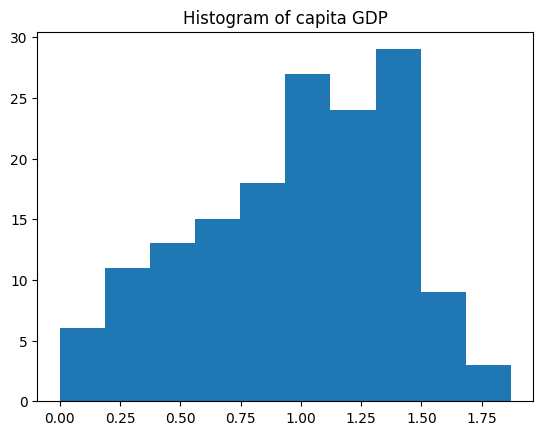

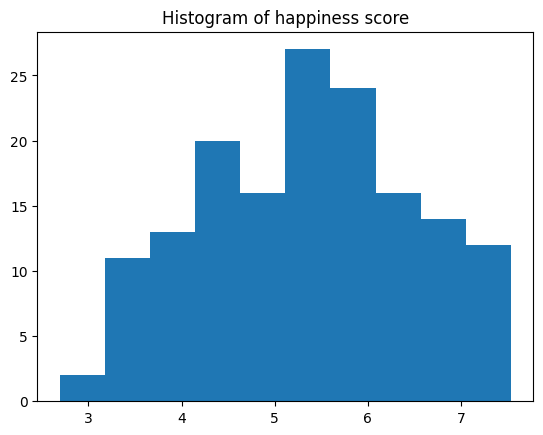

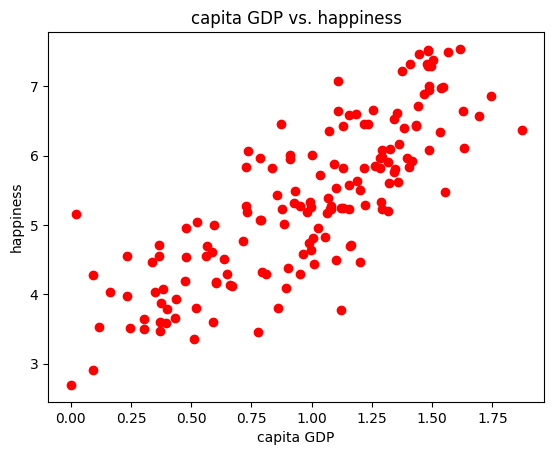

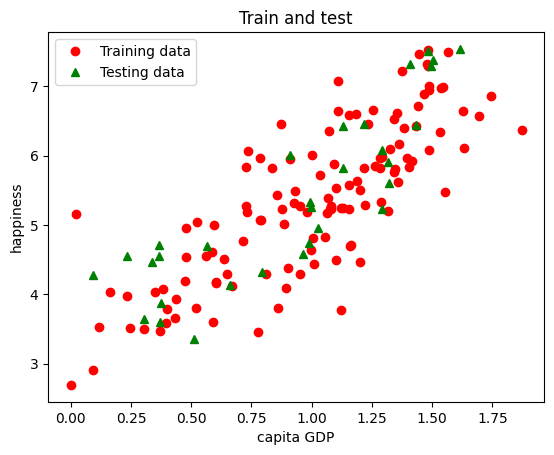

One output, one feature:
Learnt model by tool: f(x) = 2.760178119826493 + 2.5488940031775456 * x
Learnt model by me: f(x) =  2.6208385995352588 + 2.7295727867779447 * x
Prediction error by me:   0.4153054213396709
One output, two features:
Learnt model by tool: f(x) = 2.5078092804892687 + 2.356624700413637 * x1 + 1.0996327953475706 * x2
Learnt model by me: f(x) =  2.705334966388279 + 2.0228904492463697 * x1 + 1.5233188058432008 * x2
Prediction error by me:   2.0968370115344612
Two independent outputs, two features:
Learnt model by me: f(x) =  0.9109017536495394 + 0.8805885927886088 * x1 + 0.6602109095150095 * x2
Learnt model by me: f(x) =  -0.268132355544851 + 0.24756833384223326 * x1 + 0.8117472880629286 * x2
Learnt model by me: f(x) =  3.9366509097638125 + 0.19657360009616862 * x1 + -4.715195388969478 * x2
Prediction error by me:   0.1042663254286604
Prediction error by me:   1.1206552064499857
Two dependent outputs, two features:


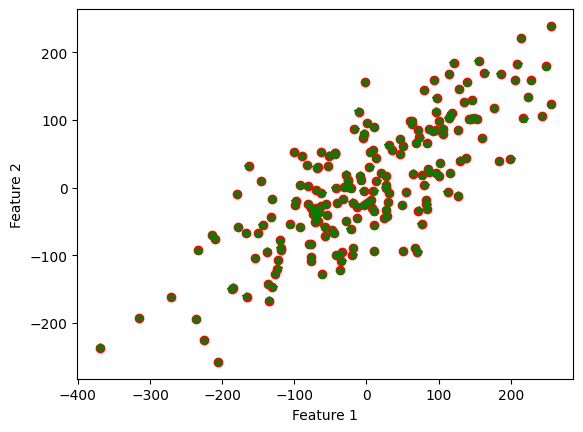

Learnt model by me: f(x) =  -0.01612606281234008 + 87.92838751078202 * x1 + 70.35926545207515 * x2
Learnt model by me: f(x) =  -0.0038405873987454875 + 16.889133923787757 * x1 + 91.73376417220389 * x2
Prediction error by me:   0.22285274956667292


In [12]:
file_v1 = 'data/world-happiness-report-2017.csv'
inputs, output = load_data(file_v1, ['Economy..GDP.per.Capita.', 'Freedom'],
                           'Happiness.Score')
train_inputs, train_outputs, validation_inputs, validation_outputs = train_and_test(inputs, output)
plot_histogram(inputs[0], "capita GDP")
plot_histogram(output, "happiness score")
plot_linearity(inputs[0], output, "capita GDP", "happiness")
plot_train_and_test(train_inputs[0], train_outputs, validation_inputs[0], validation_outputs, "capita GDP",
                    "happiness")
print("One output, one feature:")
tool_result = learning_by_tool(train_inputs[0], train_outputs, validation_inputs[0])
my_result = learning_by_me(train_inputs[0], train_outputs, validation_inputs[0])
calculate_error(my_result[2], validation_outputs, 'me')
print("One output, two features:")
tool_result_multi = learning_by_tool_multi_variant(train_inputs, train_outputs, validation_inputs)
my_result_multi = learning_by_me_multi_variant(train_inputs, train_outputs, validation_inputs)
calculate_error(my_result_multi[3], validation_outputs, 'me')

inputs, output = load_data_multi_output(file_v1, ['Economy..GDP.per.Capita.', 'Freedom'],
                                        ['Happiness.Score', 'Generosity'])
data = normalise_data([*inputs, *output])
inputs, output = data[:2], data[:-1]
train_inputs, train_outputs, validation_inputs, validation_outputs = train_and_test_multi_output(inputs, output)
print("Two independent outputs, two features:")
my_result_multi_outputs = learning_by_me_multi_outputs(train_inputs, train_outputs, validation_inputs)
calculate_error(my_result_multi_outputs[-1][0], validation_outputs[0], 'me')
calculate_error(my_result_multi_outputs[-1][1], validation_outputs[1], 'me')
print("Two dependent outputs, two features:")
my_result_multi_outputs = learning_by_me_multi_dependent_outputs()
calculate_error(my_result_multi_outputs[-1], my_result_multi_outputs[-2], 'me')